# Data 200: Data Systems for Data Analytics (Fall 2025)

## Project 1: AI Job Market Analysis

<font color='green'>**Anthea Nguyen** </font>

## Question 1:

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()
%cd ~/Downloads

C:\Users\HP\Downloads


In [4]:
df = pd.read_csv("ai_job_market.csv")
print(df.head(5))

   job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type               location salary_range_usd posted_date  \
0       Full-time        

## Question 2:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB
None


## Question 3:

In [6]:
print(df.describe())

            job_id
count  2000.000000
mean   1000.500000
std     577.494589
min       1.000000
25%     500.750000
50%    1000.500000
75%    1500.250000
max    2000.000000


## Question 4:

This isn't a Tidy Data as:
- 'salary_range_usd' packs two variables (min & max) into one column.
- 'skills_required' and 'tools_preferred' store lists in one cell.

## Question 5:

In [7]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df['salary_min'] = df['salary_range_usd'].str.split('-').str[0]
df['salary_max'] = df['salary_range_usd'].str.split('-').str[1]
df['salary_min'] = df['salary_min'].astype(float)
df['salary_max'] = df['salary_max'].astype(float)
print(df.head(5))

   job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type               location salary_range_usd posted_date  \
0       Full-time        

I know that 'skills_required' and 'tools_preferred' are NOT tidy (multiple values per cell). However, I'm keeping them unchanged because:
- These columns contain list-like text (multiple skills/tools per job). Fully tidying them would require exploding to a separate many-to-many table, adding thousands of rows and extra joins.
- I prioritized tidying variables that directly affect numeric analysis, specifically salary_range_usd → salary_min and salary_max. This fix enables valid statistics, grouping, and plots.

## Question 6:

In [8]:
#Aggregation 1:
df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2
industry_avg = df.groupby('industry')['salary_avg'].mean().sort_values(ascending = False)
print(industry_avg)

industry
E-commerce    124745.302405
Automotive    124546.021667
Tech          123217.423358
Finance       123040.451613
Retail        122791.283276
Education     121796.690476
Healthcare    120964.239777
Name: salary_avg, dtype: float64


The spread across industries is small (only a few thousand dollars), with E-commerce, Automotive, and Tech near the top and Education/Healthcare near the bottom. This pattern suggests that compensation in this dataset is driven more by the role and seniority of the position than by the industry itself; industry appears to be a secondary lever once title and level are held constant.

In [9]:
#Aggregation 2:
exp_count = df.groupby('experience_level')['job_id'].count().sort_values(ascending = False)
print (exp_count)

experience_level
Entry     702
Mid       668
Senior    630
Name: job_id, dtype: int64


Postings are fairly balanced across the ladder, witch Entry (702) is slightly higher than Mid (668) and Senior (630). This distribution indicates broad hiring demand rather than a senior-heavy market. For candidates, it implies healthy opportunities at all levels, with a modest tilt toward entry roles that may reflect ongoing team expansion and pipeline building.

In [10]:
#Aggregation 3:
job_median = df.groupby('job_title')['salary_avg'].median().sort_values(ascending = False)
print(job_median)

job_title
NLP Engineer                126599.00
ML Engineer                 125975.75
Data Analyst                124758.50
Data Scientist              123278.25
Computer Vision Engineer    123086.75
AI Researcher               122985.00
AI Product Manager          120149.75
Quant Researcher            115511.00
Name: salary_avg, dtype: float64


Median salaries are highest for specialized model-building roles such as NLP Engineer, ML Engineer, and Computer Vision Engineer, with generalist roles like Data Analyst/Scientist a notch lower. This suggests a clear premium for specialization in advanced ML subfields. In practice, developing depth in high-demand niches can lift earning potential, while generalist tracks remain solid but slightly less compensated on median.

## Question 7:

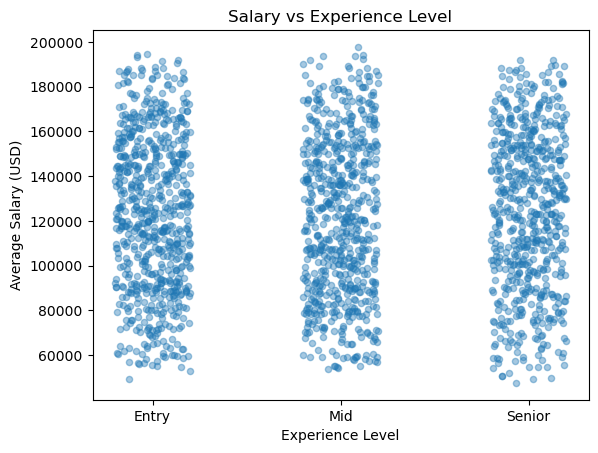

In [35]:
#Visualization 1:
levels = {'Entry': 1, 'Mid': 2, 'Senior': 3}
df['exp_numeric'] = df['experience_level'].map(levels)
jitter = np.random.uniform(-0.2, 0.2, size=len(df))
df['exp_jitter'] = df['exp_numeric'] + jitter
plt.scatter(df['exp_jitter'], df['salary_avg'], alpha=0.4, s=20)
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks([1, 2, 3], ['Entry', 'Mid', 'Senior']) 
plt.show()

- Three vertical clouds = Entry, Mid, Senior; jitter is just to separate overlapping points.
- Within-level spread is large (roughly 80k - 190k), so bands overlap heavily -> no clear separation between Entry, Mid, and Senior salaries.
- Any “senior premium” is small relative to within-level variation

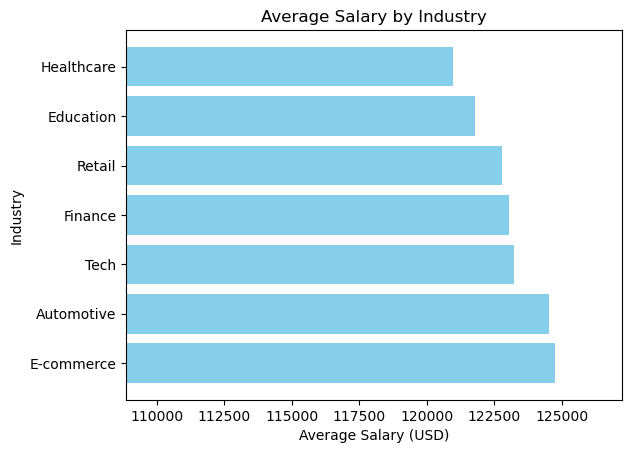

In [34]:
#Visualization 2:
min_salary = industry_avg.min() 
max_salary = industry_avg.max()
plt.barh(industry_avg.index, industry_avg.values, color='skyblue')
plt.xlim(min_salary*0.9, max_salary*1.02)
plt.xlabel('Average Salary (USD)')
plt.ylabel('Industry')
plt.title('Average Salary by Industry')
plt.show()

- Industries sit within a narrow band; E-commerce/Automotive edge highest, Healthcare/Education lowest, but the gaps are only a few thousand dollars.
- Despite visible bar length differences, the actual pay spread across industries is modest.
- The x-axis is truncated near the minimum (not zero), which magnifies small differences for readability.

## Question 8:

In [36]:
df['experience_level'].map(levels).corr(df['salary_avg'])

np.float64(0.009814900892184336)

After tidying the pay field (splitting 'salary_range_usd' into a usable 'salary_avg'), I explored two views: (1) salary by experience level using a scatter plot with light jitter, and (2) salary by industry using grouped summaries comparisons.

The scatter shows three jittered vertical bands (Entry, Mid, Senior). Jitter only spreads points sideways to reduce overplotting; it does not change salaries. Visually, the centers of the three bands are very close, and the within-band spread is wide, which leads to heavy overlap across experience levels. In practical terms, this means there isn’t a clean salary separation based solely on the Entry/Mid/Senior labels in this sample. Each band contains many roles that pay similarly to roles in the other bands.

To quantify what the plot suggests, I mapped Entry = 1, Mid = 2, Senior = 3, and computed the Pearson correlation between 'experience_level' and 'salary_avg', which is r = 0.09815. This aligns with the visual: no meaningful linear relationship between these two variables in this dataset.

The industry comparison shows modest differences. When industries are ordered by the aggregated salary metric I computed, categories like E-commerce/Automotive/Tech sit slightly higher on average, while Healthcare/Education/Retail sit a bit lower. However, the overall gaps are small relative to the variation inside each industry. In other words, within-industry dispersion dominates the between-industry differences.

Overall pattern: 
- experience bands overlap heavily, and industry shifts are small.
- the visuals and simple aggregations suggest wide salary dispersion that is not cleanly explained by experience band alone.

## Question 9:

Confidence (based on current methods): Moderate.

My conclusions rely on tidied pay data, visual inspection (scatter with jitter; industry summaries), and a simple Pearson correlation (r = 0.09815). The visuals indicate heavy overlap across experience levels, and the correlation confirms there’s no meaningful linear association. Because these are descriptive methods and a single bivariate statistic, I avoid stronger causal claims.

Why not higher:
- Visual overlap can hide subtle structure.
- Aggregations compress within-group variation.
- Potential confounders (title, location, company size, skills) aren’t controlled.

Next steps to be more credible:
- Add clear medians and IQR markers to the experience plot and show a small summary table (per level and per industry) with the same statistic (eg: medians) for easy comparison.

## Question 10:

To make the same style of charts and summaries more informative, I’d add:
- Location (city/metro) to account for cost-of-living differences.
- Years of experience (continuous) instead of broad bands (job postings; LinkedIn profiles).
- Company attributes (size, revenue, funding stage).
- Longer time coverage to compare periods (job board archives).

These additions reduce hidden confounding and clarify why salaries cluster or diverge within categories, while staying compatible with the visual/aggregation approach I used.